In [1]:
import pandas as pd

c = [
    [0.25, 0.2, 5, 1],
    [0.25, 0.3, 2, 2],
    [0.4, 0.1, 4, 3],
    [0.1, 0.4, 2, 4],
]

c = pd.DataFrame(c, columns=['заощадження витрат',
                             'гнучкість',
                             'фокус на основній діяльності',
                             'ризик'], index=[1,2,3,4])
sm = c.apply(lambda x: x.sum())
for i in range(0, len(sm)):
    c[c.columns[i]] = c[c.columns[i]].apply(lambda x: x/sm[i])
print(c.to_latex(column_format='|r|r|r|r|r|'))

\begin{tabular}{|r|r|r|r|r|}
\toprule
{} &  заощадження витрат &  гнучкість &  фокус на основній діяльності &  ризик \\
\midrule
1 &                0.25 &        0.2 &                      0.384615 &    0.1 \\
2 &                0.25 &        0.3 &                      0.153846 &    0.2 \\
3 &                0.40 &        0.1 &                      0.307692 &    0.3 \\
4 &                0.10 &        0.4 &                      0.153846 &    0.4 \\
\bottomrule
\end{tabular}



In [2]:
wc = [0.35, 0.30, 0.20, 0.15]

r = []
for i in range(0, 4):
    column = c[c.columns[i]]
    r.append(sum([column[k+1]*wc[k] for k in range(0, 4)]))
print (r)

[0.25750000000000001, 0.23999999999999999, 0.26538461538461539, 0.215]


In [3]:
%matplotlib inline

[0.35, 0.3, 0.2, 0.15]
           a1        a2        a3        a4
0.0  0.261538  0.261538  0.201183  0.276923
0.1  0.260385  0.255385  0.219527  0.259231
0.2  0.259231  0.249231  0.237870  0.241538
0.3  0.258077  0.243077  0.256213  0.223846
0.4  0.256923  0.236923  0.274556  0.206154
0.5  0.255769  0.230769  0.292899  0.188462
0.6  0.254615  0.224615  0.311243  0.170769
0.7  0.253462  0.218462  0.329586  0.153077
0.8  0.252308  0.212308  0.347929  0.135385
0.9  0.251154  0.206154  0.366272  0.117692
1.0  0.250000  0.200000  0.384615  0.100000
           a1        a2        a3        a4
0.0  0.260714  0.214286  0.313187  0.221429
0.1  0.259643  0.222857  0.297253  0.219286
0.2  0.258571  0.231429  0.281319  0.217143
0.3  0.257500  0.240000  0.265385  0.215000
0.4  0.256429  0.248571  0.249451  0.212857
0.5  0.255357  0.257143  0.233516  0.210714
0.6  0.254286  0.265714  0.217582  0.208571
0.7  0.253214  0.274286  0.201648  0.206429
0.8  0.252143  0.282857  0.185714  0.204286
0.9  0.25

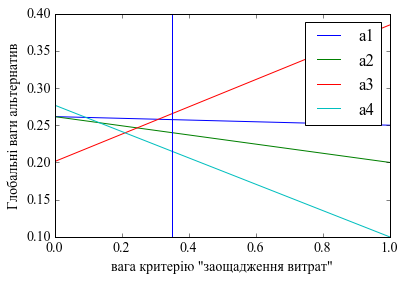

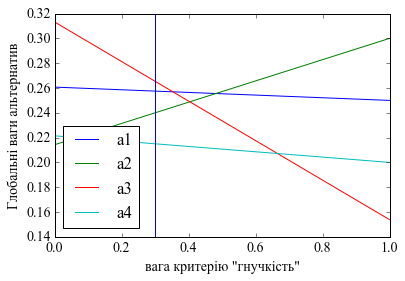

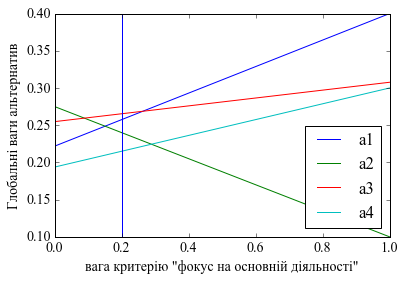

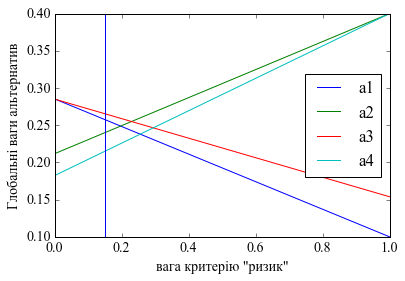

In [4]:
import numpy as np
import matplotlib
from matplotlib.pyplot import savefig, axvline, xlabel, ylabel

def calculate_wage(local_wc):
    r = []
    for i in range(0, 4):
        column = c[c.columns[i]]
        r.append(sum([column[k+1]*local_wc[k] for k in range(0, 4)]))
    return r

names = ['a'+str(i+1) for i in range(0, 4)]
crit_names = ['заощадження витрат',
                             'гнучкість',
                             'фокус на основній діяльності',
                             'ризик']

matplotlib.rc('font', family='Times New Roman', size=14)
    
first = calculate_wage(wc)
grade = np.arange(0,1.1,0.1)
print(wc)
for i in range(0, 4):
    slices = []
    for x in grade:
        change = wc[i] - x
        local_wc = wc[:]
        local_wc[i] = x
        other_wage = 1 - wc[i]
        for j in range(0, 4):
            if i != j:
                local_wc[j] = wc[j] + change * wc[j]/other_wage
        slices.append(calculate_wage(local_wc))
    df = pd.DataFrame(data=slices, index=grade, columns=names)    
    df.plot()
    axvline(x=wc[i])
    xlabel('вага критерію "' + crit_names[i] + '"')
    ylabel('Глобальні ваги альтернатив')
    print(df)
    savefig('c'+str(i+1)+'.png',dpi=500)

In [17]:
pairs = [(0, 1), (2, 0), (2, 1), (2, 3)]
columns = c.columns
data = [[] for i in range(0,4)]
for pair in pairs:
    for i in range(0, 4):
        data[i].append((r[pair[0]] - r[pair[1]]) / (wc[i] * (c[columns[pair[0]]][i+1] - c[columns[pair[1]]][i+1])))
df_data = pd.DataFrame(data, index=["(a1, a2)", "(a3, a1)", "(a3, a2)", "(a3, a4)"])
print(df_data.to_latex(column_format='|r|r|r|r|r|'))

\begin{tabular}{|r|r|r|r|r|}
\toprule
{} &         0 &         1 &         2 &          3 \\
\midrule
(a1, a2) &  1.000000 &  0.167347 &  0.392857 &   0.505792 \\
(a3, a1) & -1.166667 & -0.273333 & -0.578947 &  -3.638889 \\
(a3, a2) &  0.291667 & -0.427083 &  0.611111 &  32.750000 \\
(a3, a4) & -0.388889 &  0.976190 & -0.687500 &  -1.364583 \\
\bottomrule
\end{tabular}



In [23]:
1/3.63

0.27548209366391185

In [19]:
1/0.392

2.5510204081632653

In [ ]:
a3, a1, a2, a4